<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faricha Aulia ✨**

---

## **1. Import the existing folder on your Drive**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **2. Import libraries that will be used**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import math
import os
import glob

## **3. Make an image histogram (Use image lena.jpg)**

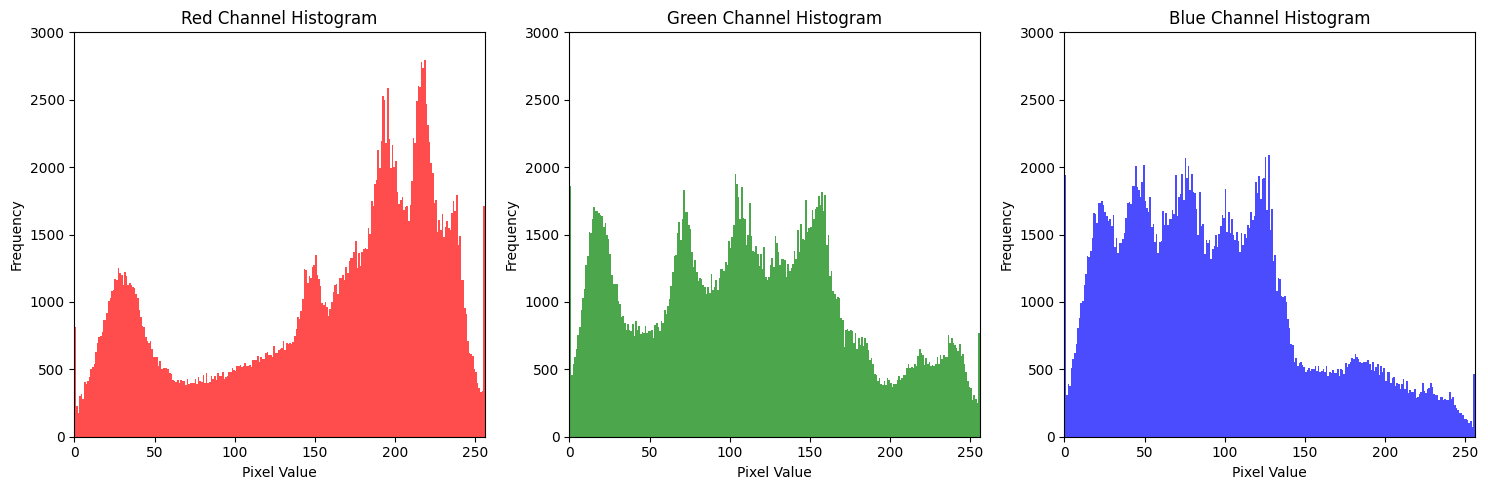

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Swap the red and blue channels
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its RGB channels
r, g, b = cv2.split(image_rgb)

# Define channel names and colors
channel_info = [('Red', 'red'), ('Green', 'green'), ('Blue', 'blue')]

# Create subplots for each channel
plt.figure(figsize=(15, 5))

for i, (channel_name, color) in enumerate(channel_info):
    plt.subplot(131 + i)
    plt.title(f'{channel_name} Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    if i == 0:
        channel = r
    elif i == 1:
        channel = g
    elif i == 2:
        channel = b
    hist, bins = np.histogram(channel.ravel(), bins=256, range=[0, 256])
    plt.hist(channel.ravel(), bins=256, range=[0, 256], color=color, alpha=0.7)
    plt.xlim([0, 256])
    plt.ylim([0, 3000])
plt.tight_layout()
plt.show()

## **4. make the same image histogram but use the library that is owned by NumPy, namely "histogram". Compare the results. Does the output appear the same?**

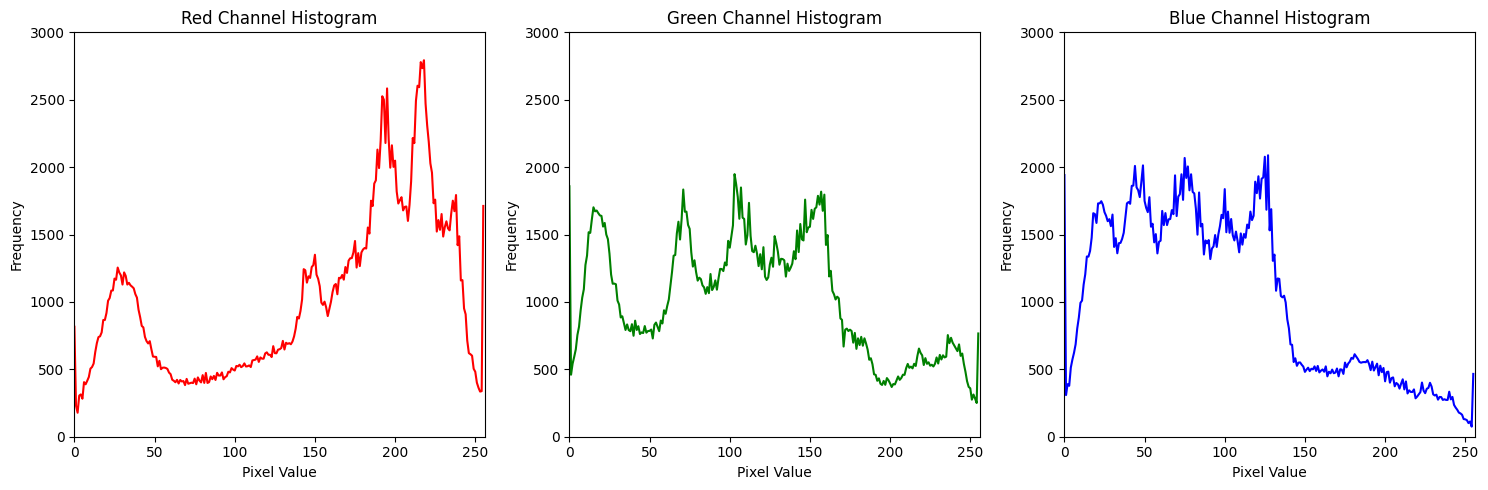

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Swap the red and blue channels
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its RGB channels
r, g, b = cv2.split(image_rgb)

# Define channel names and colors
channel_info = [('Red', 'red'), ('Green', 'green'), ('Blue', 'blue')]

# Create subplots for each channel
plt.figure(figsize=(15, 5))

for i, (channel_name, color) in enumerate(channel_info):
    plt.subplot(131 + i)
    plt.title(f'{channel_name} Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    if i == 0:
        channel = r
    elif i == 1:
        channel = g
    elif i == 2:
        channel = b
    hist, bins = np.histogram(channel.ravel(), bins=256, range=[0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 3000])

plt.tight_layout()
plt.show()

## **5. Make an image histogram and also the image display before and after the following equalization histogram process  (Use image lena_lc .jpg)**

<ipython-input-7-67c261f46abb>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/content/drive/MyDrive/Images/lena_lc.jpg')


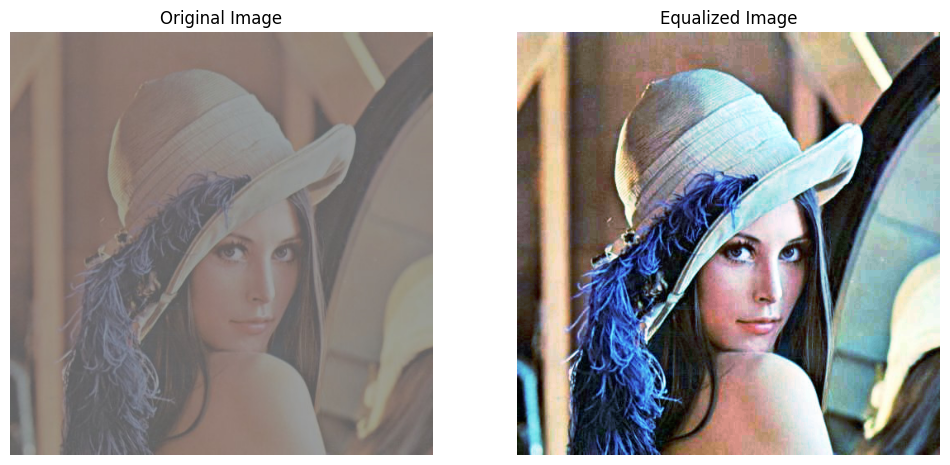

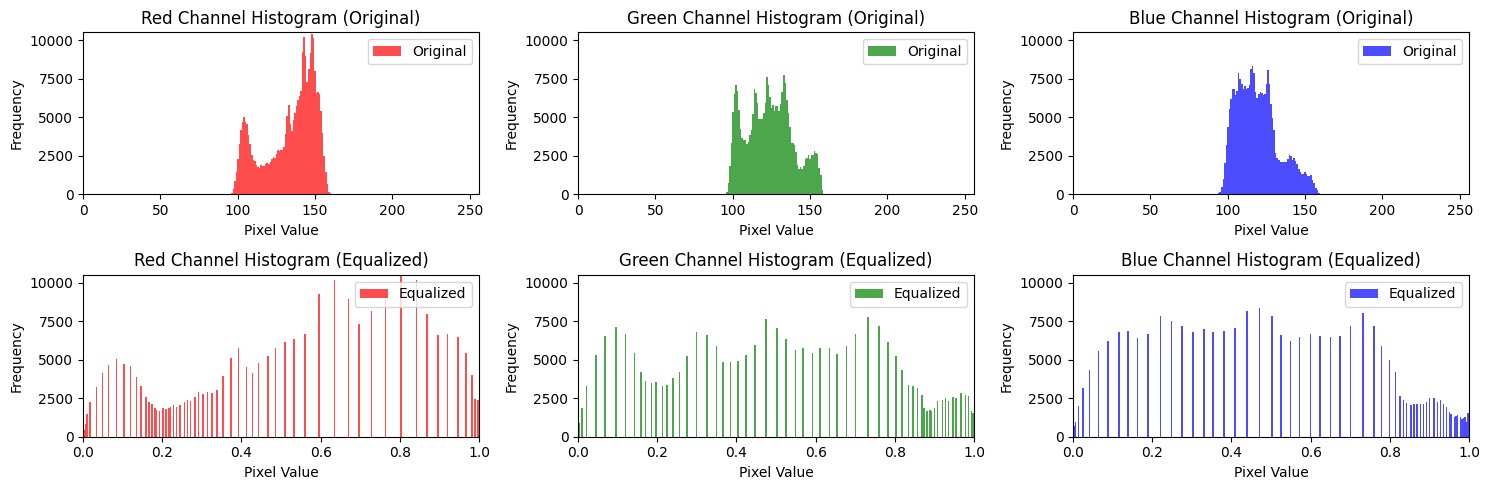

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
from skimage import exposure

# Load the image using imageio
img = imageio.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Split the image into its color channels
r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

# Apply histogram equalization to each color channel
equalized_r = exposure.equalize_hist(r)
equalized_g = exposure.equalize_hist(g)
equalized_b = exposure.equalize_hist(b)

# Create the equalized color image by merging the equalized channels
equalized_img = np.stack((equalized_r, equalized_g, equalized_b), axis=-1)

# Display the original and equalized color images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img)
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Calculate and display the histograms of the original and equalized color channels
plt.figure(figsize=(15, 5))

channel_names = ('Red', 'Green', 'Blue')
channels = (r, g, b)
equalized_channels = (equalized_r, equalized_g, equalized_b)

for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.hist(channels[i].ravel(), 256, [0, 255], color=channel_names[i][0].lower(), alpha=0.7, label='Original')
    plt.title(f'{channel_names[i]} Channel Histogram (Original)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.ylim([0, 10500])
    plt.legend(loc='upper right')

for i in range(3):
    plt.subplot(2, 3, i + 4)
    plt.hist(equalized_channels[i].ravel(), 256, [0, 1], color=channel_names[i][0].lower(), alpha=0.7, label='Equalized')
    plt.title(f'{channel_names[i]} Channel Histogram (Equalized)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 1])
    plt.ylim([0, 10500])
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## **6. make the same image histogram but use the library owned by CV2, namely "equalizeHist". Compare the results. Does the output appear the same?**

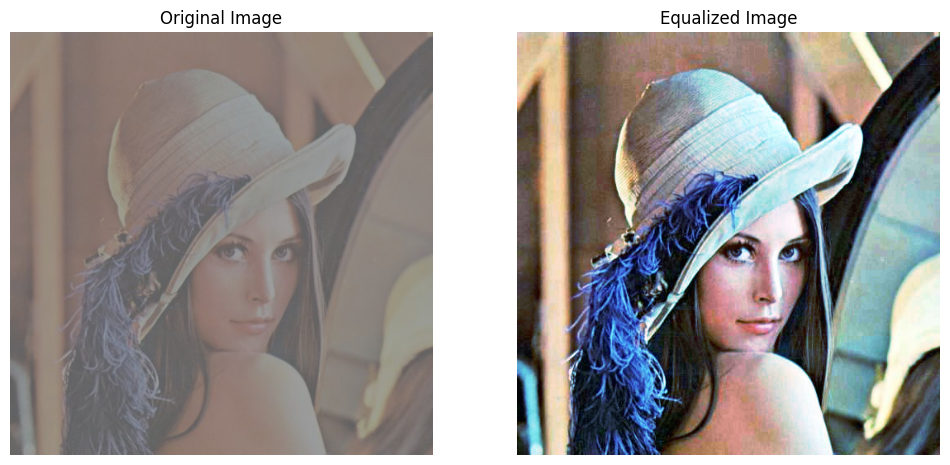

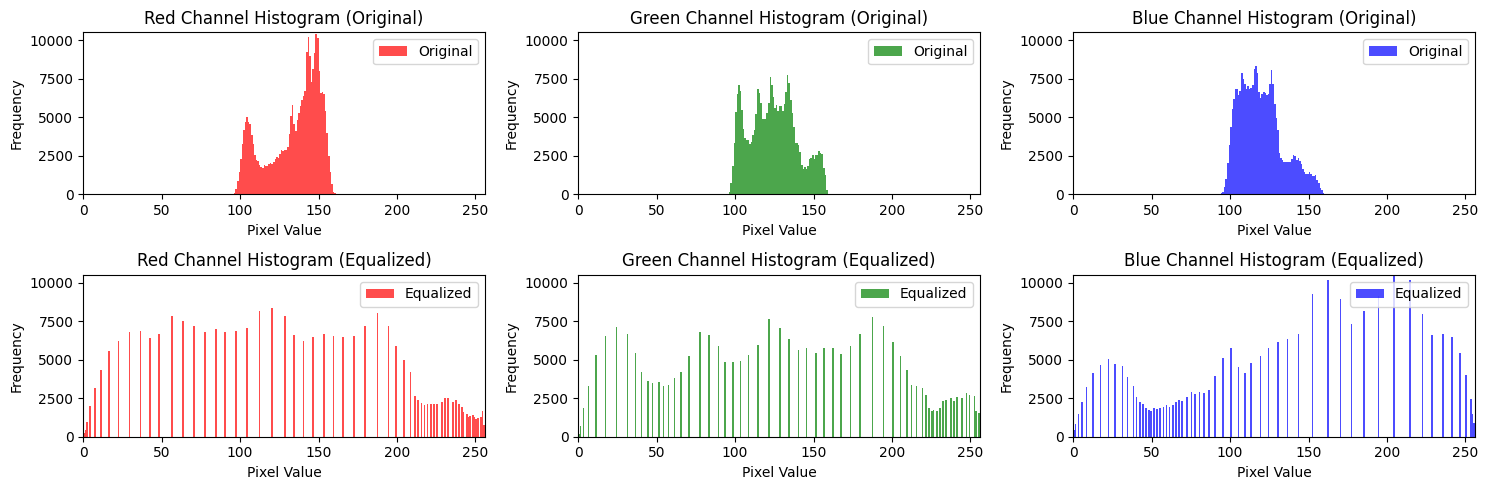

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = cv2.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Split the image into its color channels
b, g, r = cv2.split(img)

# Apply histogram equalization to each color channel
equalized_channels = [cv2.equalizeHist(channel) for channel in (b, g, r)]

# Create the equalized color image by merging the equalized channels
equalized_img = cv2.merge(equalized_channels)

# Display the original and equalized color images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Calculate and display the histograms of the original and equalized color channels
plt.figure(figsize=(15, 5))

channel_names = ('Red', 'Green', 'Blue')

for i, channel in enumerate((r, g, b)):
    plt.subplot(2, 3, i + 1)
    plt.hist(channel.ravel(), 256, [0, 256], color=channel_names[i][0].lower(), alpha=0.7, label='Original')
    plt.title(f'{channel_names[i]} Channel Histogram (Original)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.ylim([0, 10500])
    plt.legend(loc='upper right')

for i, channel in enumerate(equalized_channels):
    plt.subplot(2, 3, i + 4)
    plt.hist(channel.ravel(), 256, [0, 256], color=channel_names[i][0].lower(), alpha=0.7, label='Equalized')
    plt.title(f'{channel_names[i]} Channel Histogram (Equalized)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.ylim([0, 10500])
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## **7. Do the mapping process of 16 million RGB colors into just 8 colors, namely black, green, yellow, blue, cyan, magenta, white  (Use the image testlena .jpg)**

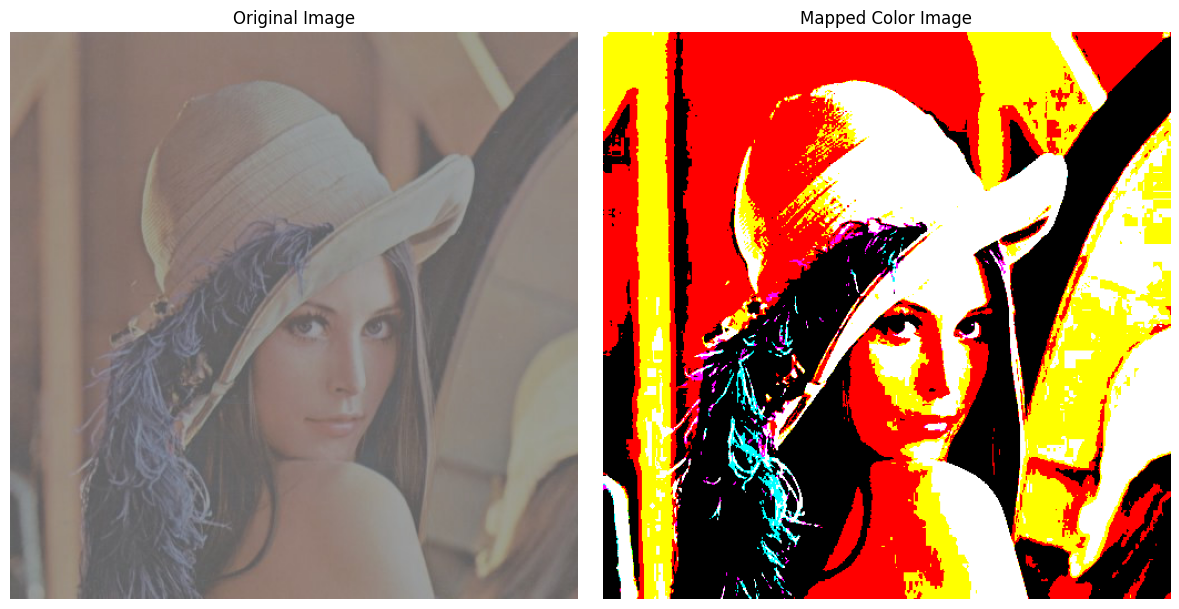

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Color palette
colors = {
    "Black": (0, 0, 0),
    "Green": (0, 255, 0),
    "Yellow": (255, 255, 0),
    "Blue": (0, 0, 255),
    "Cyan": (0, 255, 255),
    "Magenta": (255, 0, 255),
    "White": (255, 255, 255)
}

# Function to map a pixel to the nearest color
def map_to_nearest_color(pixel):
    min_dist = float('inf')
    nearest_color = None
    for color_name, color_value in colors.items():
        dist = np.linalg.norm(np.array(pixel) - np.array(color_value))
        if dist < min_dist:
            min_dist = dist
            nearest_color = color_name
    return colors[nearest_color]

# Load the image
image_path = '/content/drive/MyDrive/Images/lena_lc.jpg'
image = cv2.imread(image_path)

# Create a copy of the image and apply color mapping
mapped_image = np.apply_along_axis(map_to_nearest_color, -1, image)

# Convert the mapped image to the appropriate data type (8-bit, 3 channels)
mapped_image_uint8 = mapped_image.astype(np.uint8)

# Display the original and mapped images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(mapped_image_uint8, cv2.COLOR_BGR2RGB))
axes[1].set_title("Mapped Color Image")
axes[1].axis('off')
plt.tight_layout()
plt.show()

## **8. Do the Floyd and Steinberg dithering process like the following output (initial image  display, and after dithering display) (Use wiki.jpg image)**

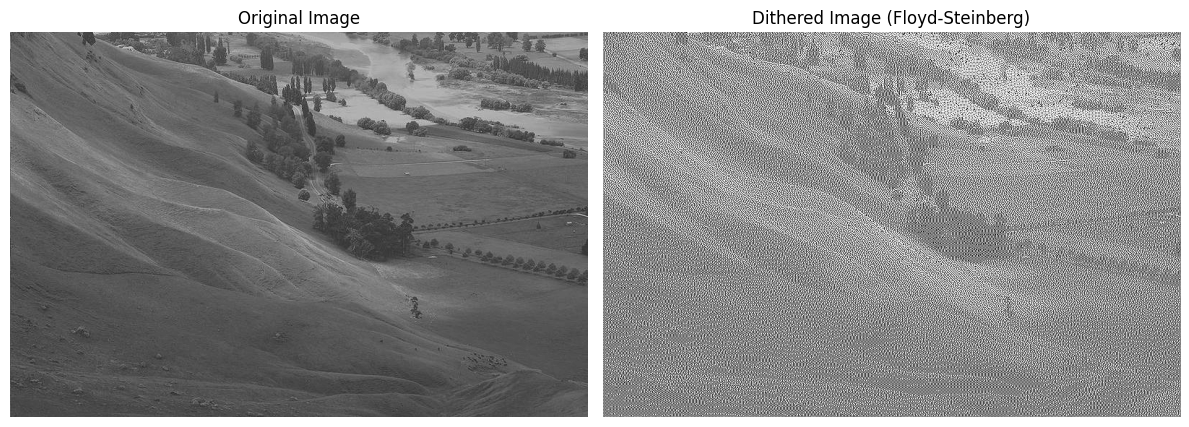

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Images/wiki.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def floyd_steinberg_dithering(image):
    height, width = image.shape
    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = image[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            image[y, x] = new_pixel
            quantization_error = old_pixel - new_pixel

            # Floyd-Steinberg Dithering Formulas
            image[y, x + 1] = image[y, x + 1] + (7/16) * quantization_error
            image[y + 1, x - 1] = image[y + 1, x - 1] + (3/16) * quantization_error
            image[y + 1, x] = image[y + 1, x] + (5/16) * quantization_error
            image[y + 1, x + 1] = image[y + 1, x + 1] + (1/16) * quantization_error

    return image
dithered_image = floyd_steinberg_dithering(image.copy())

# Display the original and dithered images
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the dithered image
plt.subplot(1, 2, 2)
plt.imshow(dithered_image, cmap='gray')
plt.title("Dithered Image (Floyd-Steinberg)")
plt.axis('off')

plt.tight_layout()
plt.show()
